# SLU10: Metrics for Classification -- Exercises

In this notebook we'll put in practice all the metrics you've learned for classification:

- Understanding the problem with accuracy
- Understanding FP, TP, FN, TN
- Understanding precision, recall
- Understanding the ROC Curve 
- Understanding AUROC
- Which model is better for a particular circumstance
- Using these metrics in day to day 


In [1]:
import pandas as pd
import math 
import numpy as np
from utils import plot_confusion_matrix, hash_answer
from matplotlib import pyplot as plt 


In [2]:
# This function is designed to be used in all the exercises

def load_data():
    # Loads classifier probabilities dataframe
    df = pd.read_csv("data/classifier_prediction_scores.csv").rename(columns={'scores': 'probas'})
    
    return df

## Useful information

In this exercise we have the following dataset: 

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>probas</th>      <th>target</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>0.288467</td>      <td>0</td>    </tr>    <tr>      <th>1</th>      <td>0.255047</td>      <td>1</td>    </tr>    <tr>      <th>2</th>      <td>0.201017</td>      <td>0</td>    </tr>    <tr>      <th>3</th>      <td>0.729307</td>      <td>1</td>    </tr>    <tr>      <th>4</th>      <td>0.148288</td>      <td>0</td>    </tr>  </tbody></table>

# Exercise 1 - Understanding the problem with Accuracy 

We will perform the following steps without using scikit: 

1. Create a column called "predicted at 0.5 threshold", which will be:
 - 0 if probas is smaller than 0.5  
 - 1 otherwise (larger or equal to 0.5)   
2. Calculate the accuracy of the predictions (feel free to use a support column called "correct prediction")
3. Calculate what the accuracy would have been if you had simply predicted 0 every time 

Start by running the cell below, which implements a small function to compute your prediction from the probas:

In [3]:
def threshold_probas(proba, threshold=.5): 
    if proba >= threshold:
        return 1
    else: 
        return 0 



Now implement below a function to compute the accuracy of a dataframe which assumes:

- Dataframe contains a `target` column with the true labels
- Dataframe contains a `prediction` column with the model prediction


In [4]:
def accuracy(df):
    """
        Given a dataframe with `prediction` and `target` columns, 
        compute the accuracy metric
    
    Args:
        df (pd.DataFrame): the dataframe, with `prediction` and `target` columns

    Returns: accuracy
        accuracy (float): accuracy measuree     
    """    

    # YOUR CODE HERE
    result = df['prediction'] == df['target']
    
    accuracy = result.sum() / result.shape[0]
    
    return accuracy


In [5]:
df_1 = pd.DataFrame({"target": np.array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0])})

df_1_all_zeros = df_1.copy()
df_1_all_zeros["prediction"] = 0 
np.testing.assert_almost_equal(accuracy(df_1_all_zeros), 0.4545, 2)

df_1_all_ones = df_1.copy()
df_1_all_ones["prediction"] = 1
np.testing.assert_almost_equal(accuracy(df_1_all_ones), 0.54545, 2)

df_2 = pd.DataFrame({"target": np.array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])})

df_2_all_zeros = df_2.copy()
df_2_all_zeros["prediction"] = 0 
np.testing.assert_almost_equal(accuracy(df_2_all_zeros), 0.2727, 2)

df_2_all_ones = df_2.copy()
df_2_all_ones["prediction"] = 1
np.testing.assert_almost_equal(accuracy(df_2_all_ones), 0.7272, 2)


Let's apply this to our actual predictions:

In [6]:
df = load_data()
df["prediction"] = df['probas'].map(threshold_probas)
print(f"Accuracy of predictions: {accuracy(df)}")


Accuracy of predictions: 0.8304


Now let's see what would happen if we just predicted zero (majority class) or one

In [7]:
df["prediction"] = 0
print(f"Accuracy of predicting always zero: {accuracy(df)}")


df["prediction"] = 1
print(f"Accuracy of predicting always one: {accuracy(df)}")


Accuracy of predicting always zero: 0.8336
Accuracy of predicting always one: 0.1664


Expected output: 

```
Predictions accuracy:               0.8304 
Accuracy of predicting always zero: 0.8336
Accuracy of predicting always one: 0.1664
```

As you see, the accuracy can be misleading and if we just focused on that we could end up with a model that just predicts all zero values. Let's move on to the techniques you've seen in the learning notebook.

We'll start with the confusion matrix and the insights it gives us

# Exercise 2: Understanding main metrics at a particular threshold 

We'll now look into confusion matrices. For this purpose we'll use a threshold of 0.3 and plot the confusion matrix 


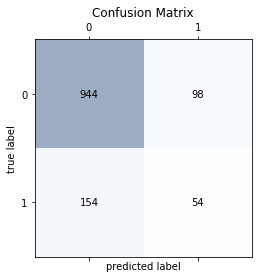

In [8]:
df = load_data()
df["prediction"] = df['probas'].map(lambda a: threshold_probas(a, threshold=0.3))

plot_confusion_matrix(df["target"], df["prediction"])


For the following confusion matrix, calculate (manually) the number of:

- False Positives    (FP)
- True Positives     (TP)
- False Negatives    (FN)
- True Negatives     (TN)

Note: you can hardcode the number in this one :) 

In [9]:
def my_confusion_matrix_analysis():
    """
    Analyse the confusion matrix above and write down the numbers for:
        - `true_positives`
        - `true_negatives`
        - `false_positives`
        - `false_negatives`
    
    Returns: true_positives, true_negatives, false_positives, false_negatives
        true_positives (int): number of true positives     
        true_negatives (int): number of true negatives     
        false_positives (int): number of false positives     
        false_negatives (int): number of false positives     

    """    

    true_positives = 54
    # YOUR CODE HERE

    true_negatives = 944
    # YOUR CODE HERE
    
    false_positives = 98
    # YOUR CODE HERE
    
    false_negatives = 154
    # YOUR CODE HERE
    
    return true_positives, true_negatives, false_positives, false_negatives



In [10]:
TP, TN, FP, FN = my_confusion_matrix_analysis()

assert hash_answer(TP) == '2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e'
assert hash_answer(TN) == '6d094db49a6e224278dd87d28835b66af6d2db257522e22c105b829cf368af98' 
assert hash_answer(FP) == '29db0c6782dbd5000559ef4d9e953e300e2b479eed26d887ef3f92b921c06a67'
assert hash_answer(FN) == '1d0ebea552eb43d0b1e1561f6de8ae92e3de7f1abec52399244d1caed7dbdfa6'


Great job! Now that you've identified what is each measure, we'll now compute the metrics you've learned about. Implement below each metric separately in a function: 

- True Positive Rate  (TPR)
- False Positive Rate (FPR)
- Recall
- Precision


Note that we pass the same input to all metric functions but **each function may discard some of the inputs**. Pay attention to the formulas given and implement each accordingly:


#### 1. False Positive rate

In [11]:
def false_positive_rate(TP, TN, FP, FN):
    """
    Given the true_positives, true_negatives, false_positives and false_negatives
    compute the false positive rate
    
    Args:
        TP (int): number of true positives     
        TN (int): number of true negatives     
        FP (int): number of false positives     
        FN (int): number of false positives     


    Returns: false_positive_rate
        false_positive_rate (float): false positive rate     
    """    

    false_positive_rate = FP / (FP + TN)  # (a.k.a False Alarm Rate!)
    # YOUR CODE HERE
    
    return false_positive_rate


In [12]:
np.testing.assert_almost_equal(false_positive_rate(10, 40, 13, 42), 0.2452, 2)
np.testing.assert_almost_equal(false_positive_rate(24, 42, 4, 64), 0.0869, 2)
np.testing.assert_almost_equal(false_positive_rate(64, 26, 64, 15), 0.7111, 2)
np.testing.assert_almost_equal(false_positive_rate(17, 15, 1, 3), 0.0625, 2)


#### 2. True Positive rate

In [13]:
    
def true_positive_rate(TP, TN, FP, FN):
    """
    Given the true_positives, true_negatives, false_positives and false_negatives
    compute the true positive rate
    
    Args:
        TP (int): number of true positives     
        TN (int): number of true negatives     
        FP (int): number of false positives     
        FN (int): number of false positives     


    Returns: true_positive_rate
        true_positive_rate (float): true positive rate     
    """    

    true_positive_rate = TP / (TP + FN) 
    # YOUR CODE HERE

    return true_positive_rate
    



In [14]:
np.testing.assert_almost_equal(true_positive_rate(10, 40, 13, 42), 0.1923, 2)
np.testing.assert_almost_equal(true_positive_rate(24, 42, 4, 64), 0.2727, 2)
np.testing.assert_almost_equal(true_positive_rate(64, 26, 64, 15), 0.8101, 2)
np.testing.assert_almost_equal(true_positive_rate(17, 15, 1, 3), 0.8500, 2)
    

#### 3. Precision metric

In [15]:
def precision_metric(TP, TN, FP, FN):
    """
    Given the true_positives, true_negatives, false_positives and false_negatives
    compute the precision
    
    Args:
        TP (int): number of true positives     
        TN (int): number of true negatives     
        FP (int): number of false positives     
        FN (int): number of false positives     


    Returns: precision
        precision (float): precision score     
    """    
    precision = TP / (TP + FP)
    # YOUR CODE HERE

    return precision




In [16]:
np.testing.assert_almost_equal(precision_metric(10, 40, 13, 42), 0.4348, 2)
np.testing.assert_almost_equal(precision_metric(24, 42, 4, 64), 0.8571, 2)
np.testing.assert_almost_equal(precision_metric(64, 26, 64, 15), 0.5000, 2)
np.testing.assert_almost_equal(precision_metric(17, 15, 1, 3), 0.94444, 2)
    

#### 4. Recall metric

In [17]:
def recall_metric(TP, TN, FP, FN):
    """
    Given the true_positives, true_negatives, false_positives and false_negatives
    compute the recall
    
    Args:
        TP (int): number of true positives     
        TN (int): number of true negatives     
        FP (int): number of false positives     
        FN (int): number of false positives     


    Returns: recall
        recall (float): recall score     
    """    
    recall = TP / (FN + TP)
    # YOUR CODE HERE

    return recall

In [18]:
np.testing.assert_almost_equal(recall_metric(10, 40, 13, 42), 0.1923, 2)
np.testing.assert_almost_equal(recall_metric(24, 42, 4, 64), 0.2727, 2)
np.testing.assert_almost_equal(recall_metric(64, 26, 64, 15), 0.8101, 2)
np.testing.assert_almost_equal(recall_metric(17, 15, 1, 3), 0.8500, 2)
    

Finally let's apply our metrics to the dataframe we had. We'll compute these for the threshold of 0.3, which corresponds to the confusion matrix presented above

In [19]:
FPR = false_positive_rate(TP, TN, FP, FN)
TPR = true_positive_rate(TP, TN, FP, FN)
precision = precision_metric(TP, TN, FP, FN)
recall = recall_metric(TP, TN, FP, FN)

print('True Positives:       %0.0f' % TP)
print('True Negatives:       %0.0f' % TN)
print('False Positives:      %0.0f' % FP)
print('False Negatives:      %0.0f' % FN)
print('False Positive rate:  %0.2f' % FPR)
print('True Positive rate:   %0.2f' % TPR)
print('precision:            %0.2f' % precision)
print('recall:               %0.2f' % recall)


True Positives:       54
True Negatives:       944
False Positives:      98
False Negatives:      154
False Positive rate:  0.09
True Positive rate:   0.26
precision:            0.36
recall:               0.26


Expected output: 

    True Positives:       <not telling you!>
    True Negatives:       <not telling you!>
    False Positives:      <not telling you!>
    False Negatives:      <not telling you!>
    False Positive rate:  0.09
    True Positive rate:   0.26
    precision:            0.36
    recall:               0.26
    
_Note: your `True Positive Rate` and `Recall` should be the same because... ehm... (check their formula!)_

# Exercise 3: model selection 

Consider the following two confusion matrixes: 

<img src="media/conf_mats.png" alt="drawing" width="600"/> 

In [20]:
# which option (A or B) is better if you are evaluating the performance of a judge over his career? 
# In this situation: 
# - 1 is guilty
# - 0 is innocent 
# - predicting 1 sends people to jail
# - predicting 0 sends people home free

best_option_for_a_judge = "A" #("A" or "B")
# YOUR CODE HERE

# which option (A or B) is best, if this is a model for screening for cancer? 
# In this situation: 
# - 1 is cancer
# - 0 is healthy
# - predicting 1 sends people to a cancer screening
# - predicting 0 sends people home 

best_option_for_cancer_screening = "B" #("A" or "B")
# YOUR CODE HERE


In [21]:
assert hash_answer(best_option_for_cancer_screening.lower()) == '3e23e8160039594a33894f6564e1b1348bbd7a0088d42c4acb73eeaed59c009d' 
assert hash_answer(best_option_for_a_judge.lower()) == 'ca978112ca1bbdcafac231b39a23dc4da786eff8147c4e72b9807785afee48bb'


# Exercise 4: Understanding the ROC Curve 

In [22]:
# for your convenience, we have already written most of this.
# most of this exercise is understanding what is going on, and completing the last functions :)

def threshold_probas(proba, threshold): 
    # returns the thresholded prediction for a single observation 
    # -----------------------------------------------------
    # inputs: 
    #     proba (float): a scores or probability, between 0.0 and 1.0
    #     threshold (float): a number between 0.0 and 1.0    
    # -----------------------------------------------------
    # example: threshold_probas(.9, .5) = 1
    if proba >= threshold:
        return 1
    else: 
        return 0 
    
def get_predictions(probas, threshold):
    # returns the thresholded predictions 
    # -----------------------------------------------------
    # inputs: 
    #     probas (pd.Series): a series of floats (scores or probabilities) between 0.0 and 1.0
    #     threshold (float): a number between 0.0 and 1.0    
    # -----------------------------------------------------
    # example: get_predictions([.1, .2, .5], .4) = [0, 0, 1]
    # -----------------------------------------------------
    return probas.map(lambda x: threshold_probas(x, threshold))

def calculate_number_of_true_positives(predictions, target):
    # calculates the number of true positives 
    # -----------------------------------------------------
    # inputs: 
    #     predictions (pd.Series): a series of ints, either 0s or 1s, with predictions
    #     target (pd.Series): a series of ints, either 0s or 1s, with observed outcomes 
    # -----------------------------------------------------
    # example: calculate_number_of_true_positives([[0, 1, 0]], [0, 1, 1]) = 1 
    # -----------------------------------------------------
    positive_predictions_indexes = (predictions == 1)
    true_positives = predictions.loc[positive_predictions_indexes] == target[positive_predictions_indexes]
    return true_positives.sum()
    
def calculate_number_of_false_positives(predictions, target): 
    # calculates the number of false positives 
    # -----------------------------------------------------
    # inputs: 
    #     predictions (pd.Series): a series of ints, either 0s or 1s, with predictions
    #     target (pd.Series): a series of ints, either 0s or 1s, with observed outcomes 
    # -----------------------------------------------------
    # example: calculate_number_of_false_positives([[0, 1, 0]], [0, 1, 1]) = 0
    # -----------------------------------------------------
    positive_predictions_indexes = (predictions == 1)
    false_positives = predictions.loc[positive_predictions_indexes] != target[positive_predictions_indexes]
    return false_positives.sum()
    
def calculate_number_of_true_negatives(predictions, target): 
    # calculates the number of true_negatives
    # -----------------------------------------------------
    # inputs: 
    #     predictions (pd.Series): a series of ints, either 0s or 1s, with predictions
    #     target (pd.Series): a series of ints, either 0s or 1s, with observed outcomes 
    # -----------------------------------------------------
    # example: calculate_number_of_true_negatives([[0, 1, 0]], [0, 1, 1]) = 1 
    # -----------------------------------------------------
    negative_predictions_indexes = (predictions == 0)
    true_negatives = predictions.loc[negative_predictions_indexes] == target[negative_predictions_indexes]
    return true_negatives.sum()

def calculate_number_of_false_negatives(predictions, target): 
    # calculates the number of false_negatives
    # -----------------------------------------------------
    # inputs: 
    #     predictions (pd.Series): a series of ints, either 0s or 1s, with predictions
    #     target (pd.Series): a series of ints, either 0s or 1s, with observed outcomes 
    # -----------------------------------------------------
    # example: calculate_number_of_false_negatives([[0, 1, 0]], [0, 1, 1]) = 1 
    # -----------------------------------------------------
    negative_predictions_indexes = (predictions == 0)
    false_negatives = predictions.loc[negative_predictions_indexes] != target[negative_predictions_indexes]
    return false_negatives.sum()

def calculate_true_positives_rate(predictions, target):
    # calculate the true positive rate
    # hint: we have defined most things above, so 2 of the lines are just function calls 
    # true_positive_rate = ... (~ 3 lines)
    # YOUR CODE HERE
    # TP / (TP + FN) 
    true_positives = calculate_number_of_true_positives(predictions, target)
    false_negatives = calculate_number_of_false_negatives(predictions, target)

    true_positive_rate = true_positives / (true_positives + false_negatives)

    return true_positive_rate

def calculate_false_positives_rate(predictions, target):
    # calculate the false positive rate 
    # hint: we have defined most things above, so 2 of the lines are just function calls 
    # false_positive_rate = ... (~ 3 lines)
    # YOUR CODE HERE
    # FP / (FP + TN)
    
    false_positives = calculate_number_of_false_positives(predictions, target)
    true_negatives = calculate_number_of_true_negatives(predictions, target)
    
    false_positive_rate = false_positives / (false_positives + true_negatives)
    
    return false_positive_rate

def hand_made_roc_curve(probas, target, list_of_thresholds):
    
    TPRs = {}
    FPRs = {}
    
    # for each threshold, get the predictions, and calculate the TPR and FPR
    # hint: you already defined everything above, so each line should be just a function call   
    for threshold in list_of_thresholds:
        predictions = get_predictions(probas, threshold)
        TPRs[threshold] = calculate_true_positives_rate(predictions, target)
        FPRs[threshold] = calculate_false_positives_rate(predictions, target)
        # YOUR CODE HERE
    
    return {'True Positive Rate': TPRs, 'False Positive Rate': FPRs}

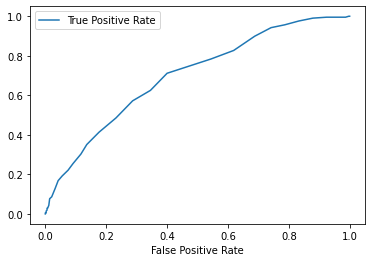

,False Positive Rate,True Positive Rate
Thresholds,,
0.041649,0.964491,0.995192
0.050396,0.924184,0.995192
0.059975,0.879079,0.990385
0.070387,0.833013,0.975962
0.081633,0.786948,0.956731
0.093711,0.741843,0.942308
0.106622,0.688100,0.899038
0.120367,0.619002,0.826923
0.134944,0.544146,0.783654


In [23]:
df = load_data()

# generating a space of thresholds (we'll be more "dense near zero")
list_of_thresholds = np.linspace(0, 10) ** 2 / 100

# using the function you have just created 
hand_made_roc = hand_made_roc_curve(df['probas'], df['target'], list_of_thresholds)

# just making a dataframe to pretty things up
hand_made_roc_df = pd.DataFrame({'False Positive Rate': hand_made_roc['False Positive Rate'], 
                        'True Positive Rate': hand_made_roc['True Positive Rate']})

# naming the index
hand_made_roc_df.index.name = 'Thresholds'

# plotting the ROC curve 
hand_made_roc_df.set_index('False Positive Rate').plot();
plt.show()

# displaying the ROC curve 
display(hand_made_roc_df.iloc[10:20])

Expected output: 

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>fpr</th>      <th>tpr</th>    </tr>    <tr>      <th>Thresholds</th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>0.041649</th>      <td>0.964491</td>      <td>0.995192</td>    </tr>    <tr>      <th>0.050396</th>      <td>0.924184</td>      <td>0.995192</td>    </tr>    <tr>      <th>0.059975</th>      <td>0.879079</td>      <td>0.990385</td>    </tr>    <tr>      <th>0.070387</th>      <td>0.833013</td>      <td>0.975962</td>    </tr>    <tr>      <th>0.081633</th>      <td>0.786948</td>      <td>0.956731</td>    </tr>    <tr>      <th>0.093711</th>      <td>0.741843</td>      <td>0.942308</td>    </tr>    <tr>      <th>0.106622</th>      <td>0.688100</td>      <td>0.899038</td>    </tr>    <tr>      <th>0.120367</th>      <td>0.619002</td>      <td>0.826923</td>    </tr>    <tr>      <th>0.134944</th>      <td>0.544146</td>      <td>0.783654</td>    </tr>    <tr>      <th>0.150354</th>      <td>0.467370</td>      <td>0.745192</td>    </tr>  </tbody></table>

In [24]:
df = load_data()

hand_made_roc = hand_made_roc_curve(df['probas'], df['target'], list_of_thresholds)
hand_made_roc_df = pd.DataFrame({'False Positive Rate': hand_made_roc['False Positive Rate'], 
                        'True Positive Rate': hand_made_roc['True Positive Rate']})

assert math.isclose(hand_made_roc_df['False Positive Rate'].iloc[15], 0.741, abs_tol=.001)
assert math.isclose(hand_made_roc_df['True Positive Rate'].sum(), 23.85, abs_tol=.01)
assert hand_made_roc_df.shape == (50, 2)


# Exercise 5: Understanding AUROC (Area under the ROC Curve)

Great! You (hopefully) made a ROC curve! 

We also established that an important metric was the AUROC, which was, quite simply, the area under the curve. 

Instead of using super-sophisticated methods for calculating areas, we have just printed some rectangles on top of (your!) ROC curve and printed the heights. 

All rectangles have a side of 0.1.

<img src="media/roc_with_squares.png" alt="drawing" width="600"/>

In [25]:
# what is the area under the ROC curve? (approximately, using the rectangles)

approximate_area_under_the_ROC_curve = (.78 + .81 + .83 + .84 + .89 + .91 + .92 + .93 + .97 + 1) * .1
# YOUR CODE HERE

In [26]:
assert hash_answer(round(approximate_area_under_the_ROC_curve, 3)
                  ) == 'af83e05e96b869cab105fdf201163c84e8a953ae17c50db344c3f58d7dd74a0b'


# Exercise 6: The joy of scikit 
Ok, now you (finally) get to use scikit :) 

In [27]:
df = load_data()

df['prediction'] = get_predictions(df['probas'], threshold=.3)
df.head()


,probas,target,prediction
0,0.288467,0,0
1,0.255047,1,0
2,0.201017,0,0
3,0.729307,1,1
4,0.148288,0,0


Start by implementing some basic metrics - accuracy, precision and recall - using scikitlearn's functions instead of implementing from scratch:

In [28]:
def accuracy_score_sklearn(predictions, target):
    """
    Given the predicted and true labels, return the accuracy using
    sklearn
    
    Args:
        predictions (pd.Series or np.array): classifier predictions     
        target (pd.Series or np.array): true labels     

    Returns: accuracy
        accuracy (float): accuracy score     
    """    
    # NOTE: Even though this is not a good programming practice, just 
    #       for the sake of the exercise, ensure you import the right 
    #       function within this code:
    
    # Hint:
    # from ...
    # precision = ...
    # YOUR CODE HERE

    from sklearn.metrics import accuracy_score   
    return accuracy_score(y_pred=predictions, y_true=target)


def precision_metric_sklearn(predictions, target):
    """
    Given the predicted and true labels, return the precision using
    sklearn
    
    Args:
        predictions (pd.Series or np.array): classifier predictions     
        target (pd.Series or np.array): true labels     

    Returns: precision
        precision (float): precision score     
    """    
    # NOTE: Even though this is not a good programming practice, just 
    #       for the sake of the exercise, ensure you import the right 
    #       function within this code:
    
    # Hint:
    # from ? import ...
    # precision = ...
    # YOUR CODE HERE

    from sklearn.metrics import precision_score   
    return precision_score(y_pred=predictions, y_true=target)


def recall_score_sklearn(predictions, target):
    """
    Given the predicted and true labels, return the recall using
    sklearn
    
    Args:
        predictions (pd.Series or np.array): classifier predictions     
        target (pd.Series or np.array): true labels     

    Returns: recall
        recall (float): recall score     
    """    
    # NOTE: Even though this is not a good programming practice, just 
    #       for the sake of the exercise, ensure you import the right 
    #       function within this code:
    
    # Hint:
    # from ? import ...
    # precision = ...
    # YOUR CODE HERE

    from sklearn.metrics import recall_score
    return recall_score(y_pred=predictions, y_true=target)



In [29]:
df_1 = df.iloc[100:200].copy()

np.testing.assert_almost_equal(accuracy_score_sklearn(df_1['prediction'], df_1['target']), 0.7400, 2)
np.testing.assert_almost_equal(precision_metric_sklearn(df_1['prediction'], df_1['target']), 0.2778, 2)
np.testing.assert_almost_equal(recall_score_sklearn(df_1['prediction'], df_1['target']), 0.2778, 2)

df_2 = df.iloc[0:50].copy()

np.testing.assert_almost_equal(accuracy_score_sklearn(df_2['prediction'], df_2['target']), 0.7600, 2)
np.testing.assert_almost_equal(precision_metric_sklearn(df_2['prediction'], df_2['target']), 0.5000, 2)
np.testing.assert_almost_equal(recall_score_sklearn(df_2['prediction'], df_2['target']), 0.2500, 2)


Now let's check the metrics for the full dataset:

In [30]:
print(f"Accuracy: {accuracy_score_sklearn(df['prediction'], df['target'])}")
print(f"Precision: {precision_metric_sklearn(df['prediction'], df['target'])}")
print(f"Recall: {recall_score_sklearn(df['prediction'], df['target'])}")


Accuracy: 0.7984
Precision: 0.35526315789473684
Recall: 0.25961538461538464


Expected output: 

> Accuracy: 0.7984 \
> Precision: 0.35526315789473684 \
> Recall: 0.25961538461538464

Great! Now let's obtain our confusion matrix in the same way:

In [31]:
def confusion_matrix_sklearn(predictions, target):
    """
    Given the predicted and true labels, return the confusion
    matrix using scikitlearn
    
    Args:
        predictions (pd.Series or np.array): classifier predictions     
        target (pd.Series or np.array): true labels     

    Returns: conf_mat
        conf_mat: confusion_matrix
    """    

    # importing the correct functions, return scikit's confusion matrix
        # NOTE: Even though this is not a good programming practice, just 
    #       for the sake of the exercise, ensure you import the right 
    #       function within this code:
    
    # Hint:

    # from ? import ...
    # conf_mat = ...
    # YOUR CODE HERE

    from sklearn.metrics import confusion_matrix
    return confusion_matrix(y_true=target, y_pred=predictions)



In [32]:
df_1 = df.iloc[100:200].copy()

np.testing.assert_array_almost_equal(
    confusion_matrix_sklearn(df_1['prediction'], df_1['target']), 
    [[69, 13], [13,  5]], 
    2
)

df_2 = df.iloc[0:50].copy()

np.testing.assert_array_almost_equal(
    confusion_matrix_sklearn(df_2['prediction'], df_2['target']), 
    [[35, 3], [9, 3]], 
    2
)


And we can check the matrix for the full dataset:

In [33]:
print(f"Confusion matrix:\n {confusion_matrix_sklearn(df['prediction'], df['target'])}")


Confusion matrix:
 [[944  98]
 [154  54]]


Expected output: 

> Confusion matrix: \
> \[ \[ 944  98 \] \
>   \[ 154  54 \] \]

In [34]:
def get_roc_sklearn(probas, target):
    """
    Given the predicted probabilities (probas) and true labels, 
    return the information regarding the roc curve - false positives rate,
    true positives rate and thresholds - and the area under the curve
    
    Args:
        probas (pd.Series or np.array): classifier probabilities     
        target (pd.Series or np.array): true labels     

    Returns: fpr, tpr, thresholds, roc_auc
        fpr: false positives rates array for roc curve
        tpr: true positives rates array for roc curve
        thresholds: thresholds array for roc curve
        roc_auc: roc area under the curve

    """    

    # from ? import ... 
    # fpr, tpr, thresholds = ...
    # roc_auc = ...
    # YOUR CODE HERE
    from sklearn.metrics import (roc_auc_score, roc_curve)
    
    fpr, tpr, thresholds = roc_curve(y_score=probas, y_true=target)
    roc_auc = roc_auc_score(y_score=probas, y_true=target)
    
    return fpr, tpr, thresholds, roc_auc


In [35]:
df_1 = df.iloc[100:200].copy()

fpr_1, tpr_1, thresholds_1, roc_auc_1 = get_roc_sklearn(df_1['probas'], df_1['target'])

np.testing.assert_array_almost_equal(fpr_1[3:6], [0.0244, 0.0366, 0.0366], 3)
np.testing.assert_array_almost_equal(tpr_1[6:8], [0.1667, 0.2222], 3)
np.testing.assert_array_almost_equal(thresholds_1[7:10], [0.3578, 0.3378, 0.3356], 3)
np.testing.assert_almost_equal(roc_auc_1, 0.6714, 2)

df_2 = df.iloc[0:50].copy()

fpr_2, tpr_2, thresholds_2, roc_auc_2 = get_roc_sklearn(df_2['probas'], df_2['target'])

np.testing.assert_array_almost_equal(fpr_2[3:6], [0.0526, 0.0526, 0.0789], 3)
np.testing.assert_array_almost_equal(tpr_2[1:3], [0.0833, 0.1667], 3)
np.testing.assert_array_almost_equal(thresholds_2[7:10], [0.2808, 0.2550, 0.2449], 3)
np.testing.assert_almost_equal(roc_auc_2, 0.725, 2)


Finally, let's run it for the whole dataset:

In [36]:
fpr_test, tpr_test, thresholds_test, roc_auc_test = get_roc_sklearn(df['probas'], df['target'])
print(fpr_test[20:30])
print(tpr_test[20:30])
print(thresholds_test[30:45])
print(roc_auc_test)

[0.02399232 0.02399232 0.02495202 0.02495202 0.02783109 0.02783109
 0.02975048 0.02975048 0.03358925 0.03358925]
[0.10096154 0.10576923 0.10576923 0.11538462 0.11538462 0.12019231
 0.12019231 0.12980769 0.12980769 0.13461538]
[0.39655128 0.39446442 0.39220204 0.3893066  0.38817124 0.38330687
 0.38128277 0.37884849 0.37641972 0.37601994 0.37019737 0.36928763
 0.36803879 0.36659233 0.35809179]
0.6980335523401742


Expected output: 

    [0.02399232 0.02399232 0.02495202 0.02495202 0.02783109 0.02783109
     0.02975048 0.02975048 0.03358925 0.03358925]
    [0.10096154 0.10576923 0.10576923 0.11538462 0.11538462 0.12019231
     0.12019231 0.12980769 0.12980769 0.13461538]
    [0.39655128 0.39446442 0.39220204 0.3893066  0.38817124 0.38330687
     0.38128277 0.37884849 0.37641972 0.37601994 0.37019737 0.36928763
     0.36803879 0.36659233 0.35809179]
    0.6980335523401742

Congratulations! You made it to the end of another unit! You are now ready to explore more about classification and regression problems and other particularities of model training and selection!

See you on the next unit!